In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.preprocessing import image
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [4]:
data = []
labels = []
classes = 10
cur_path = './Dataset/'

#Retrieving the images and their labels
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((50,50))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
            # exit()

#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape)

(570, 50, 50, 3)


In [5]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

(570, 50, 50, 3) (570,)
(456, 50, 50, 3) (114, 50, 50, 3) (456,) (114,)


In [6]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(10, activation='softmax'))

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 42, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 21, 21, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 21, 21, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 19, 19, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 17, 17, 64)        36928     
                                                        

In [8]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("handgesture_model.h5")

Epoch 1/15
15/15 [==============================] - 5s 218ms/step - loss: 12.3632 - accuracy: 0.1272 - val_loss: 2.2196 - val_accuracy: 0.3070
Epoch 2/15
15/15 [==============================] - 3s 222ms/step - loss: 2.1282 - accuracy: 0.2697 - val_loss: 1.7555 - val_accuracy: 0.4035
Epoch 3/15
15/15 [==============================] - 3s 218ms/step - loss: 1.4491 - accuracy: 0.5066 - val_loss: 0.6498 - val_accuracy: 0.8860
Epoch 4/15
15/15 [==============================] - 3s 215ms/step - loss: 0.7306 - accuracy: 0.7544 - val_loss: 0.2976 - val_accuracy: 0.9211
Epoch 5/15
15/15 [==============================] - 3s 215ms/step - loss: 0.3008 - accuracy: 0.9057 - val_loss: 0.1884 - val_accuracy: 0.9474
Epoch 6/15
15/15 [==============================] - 3s 220ms/step - loss: 0.2351 - accuracy: 0.9320 - val_loss: 0.1813 - val_accuracy: 0.9298
Epoch 7/15
15/15 [==============================] - 3s 216ms/step - loss: 0.1964 - accuracy: 0.9518 - val_loss: 0.1214 - val_accuracy: 0.9386
Epoch

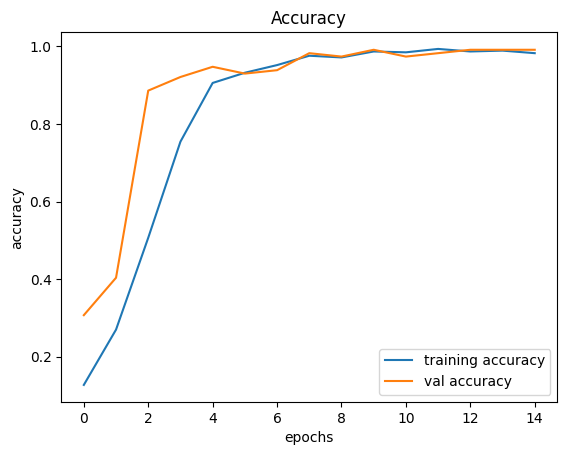

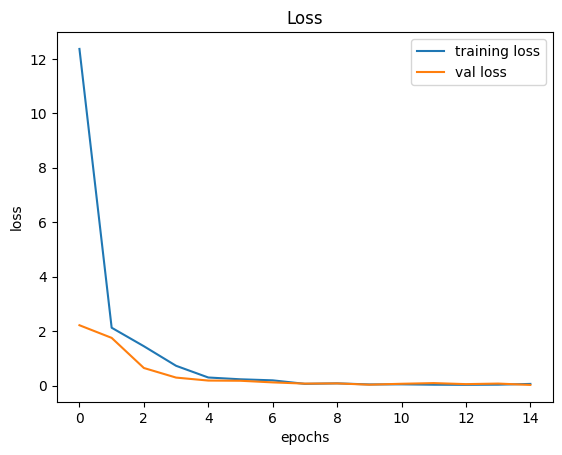

In [9]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Kiểm tra khả năng dự đoán của mô hình sau khi Training

In [36]:
save_model = load_model("handgesture_model.h5")
result = save_model.predict(X_test[50:51])

1/1 [==============================] - 0s 64ms/step


In [37]:
result

array([[2.40864720e-05, 1.65914912e-06, 3.60538252e-06, 9.99779046e-01,
        8.65214986e-07, 1.43742827e-05, 1.43791156e-04, 1.23867985e-05,
        2.07773519e-06, 1.80787174e-05]], dtype=float32)

In [38]:
final = np.argmax(result) #Lấy dự đoán có đọ chính xác cao nhất
print("Class: ", final)

Class:  3


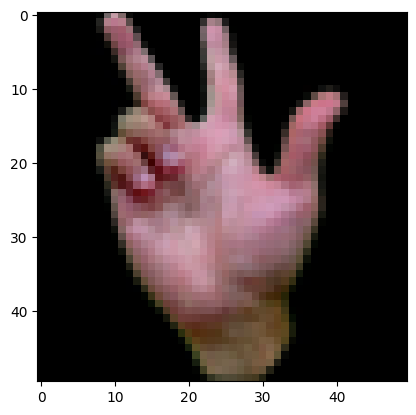

In [39]:
plt.imshow(X_test[50])